In [1]:
import pandas as pd
# import numpy as np

In [34]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [5]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [35]:
purpose_dummy = pd.get_dummies(df['purpose'], drop_first=True)

In [36]:
purpose_dummy.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [37]:
df.drop('purpose', axis = 1, inplace=True)

In [38]:
df = pd.concat([df, purpose_dummy], axis = 1)

In [39]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [11]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


In [12]:
import seaborn as sns

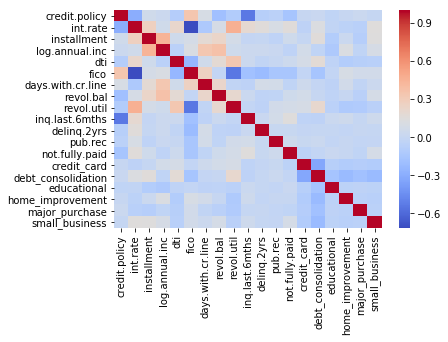

In [13]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [14]:
# dropping 'revol.util', 'fico', 'inq.last.6mths'

# home_improvement delinq.2yrs

In [40]:
df.drop(['revol.util', 'fico', 'inq.last.6mths'], axis = 1, inplace=True)

In [41]:
df.drop(['home_improvement', 'delinq.2yrs'], axis = 1, inplace=True)

In [42]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854,0,0,0,1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,0,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511,0,0,0,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667,0,0,0,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,0,0,1,0,0,0,0


In [18]:
# Splitting the dataframe as no need to scale all columns. Many columns have values in 0 & 1

# can use iloc method to get the required columns 

In [43]:
df_x1 = df[['installment', 'log.annual.inc', 'int.rate', 'dti', 'days.with.cr.line', 'revol.bal']]

In [44]:
df_x1.head(1)

,installment,log.annual.inc,int.rate,dti,days.with.cr.line,revol.bal
0,829.1,11.350407,0.1189,19.48,5639.958333,28854


In [45]:
df_x2 = df.drop(['installment','log.annual.inc','int.rate','dti','days.with.cr.line','revol.bal','not.fully.paid'], axis = 1)

In [46]:
df_x2.head(2)

,credit.policy,pub.rec,credit_card,debt_consolidation,educational,major_purchase,small_business
0,1,0,0,1,0,0,0
1,1,0,1,0,0,0,0


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss = StandardScaler()

In [49]:
scaled_array = ss.fit_transform(df_x1)

In [50]:
scaled_array

array([[ 2.46309947,  0.68038804, -0.13931753,  0.99850529,  0.4322297 ,
         0.35373245],
       [-0.43885443,  0.2440308 , -0.57886837,  0.24454045, -0.72123005,
         0.49501762],
       [ 0.23070836, -0.90865897,  0.48648368, -0.14188468,  0.05976963,
        -0.39707277],
       ...,
       [-1.06867038, -0.54569448, -0.57886837,  0.07021332, -0.44485963,
        -0.20376479],
       [ 0.1569135 , -0.18272998,  1.39166043,  0.95492351, -1.10572219,
        -0.50108875],
       [ 2.58060136,  0.54059439,  0.61685894,  0.53363294,  0.07178501,
         0.62110478]])

In [51]:
X = pd.DataFrame(scaled_array, columns=df_x1.columns)

In [52]:
X.head(2)

,installment,log.annual.inc,int.rate,dti,days.with.cr.line,revol.bal
0,2.463099,0.680388,-0.139318,0.998505,0.43223,0.353732
1,-0.438854,0.244031,-0.578868,0.244540,-0.72123,0.495018


In [29]:
type(X)

pandas.core.frame.DataFrame

In [53]:
X = pd.concat([X, df_x2], axis = 1)

In [54]:
X.head()

,installment,log.annual.inc,int.rate,dti,days.with.cr.line,revol.bal,credit.policy,pub.rec,credit_card,debt_consolidation,educational,major_purchase,small_business
0,2.463099,0.680388,-0.139318,0.998505,0.432230,0.353732,1,0,0,1,0,0,0
1,-0.438854,0.244031,-0.578868,0.244540,-0.721230,0.495018,1,0,1,0,0,0,0
2,0.230708,-0.908659,0.486484,-0.141885,0.059770,-0.397073,1,0,0,1,0,0,0
3,-0.757022,0.680388,-0.813544,-0.654697,-0.745277,0.496321,1,0,0,1,0,0,0
4,-1.043992,0.597961,0.743509,0.343326,-0.198161,-0.360663,1,0,1,0,0,0,0


In [32]:
Y = df['not.fully.paid']

In [33]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [57]:
X_train.shape

(6704, 13)

In [58]:
X_test.shape

(2874, 13)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier()

In [63]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
Y_pred = model.predict(X_test)

In [65]:
Y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix 

In [67]:
confusion_matrix(Y_pred, Y_test)

array([[2012,  369],
       [ 396,   97]], dtype=int64)

In [68]:
(2012+97)/2874

0.7338204592901879